In [32]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as optimize
%matplotlib inline

bare quark mass without dimension: $\frac{m}{\Lambda}=\frac{2.177 MeV}{891 MeV}$

unity of lenth without dimension: $fm\cdot\Lambda=\frac{891 MeV}{197.33 MeV}$

In [33]:
m=2.177/891 #m/lambda
fm=891/197.33 #lambda/197.33MeV
G=3.881

effective mass: $m^*(x,\phi)=m+\phi e^{-x^2}$

energy: $E(x,\phi)=\sqrt{x^2+m^{*2}(x,\phi)}$

$||\frac{\partial \Omega}{\partial\phi}||=|\frac{\phi}{2G}-\frac{6}{\pi^2}\int_0^\infty dx\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\{1-\frac{1}{1+e^(E-\mu)/T}-\frac{1}{1+e^{(E+\mu)/T}}\}|\rightarrow \\\qquad|\ \phi-\frac{12\cdot G}{\pi^2}\int_0^\infty\frac{m^*(x,\phi)}{E(x,\phi)}x^2e^{-x^2}\Theta(E-\mu)|$

$\Omega=\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+T\ln(1+e^{-\frac{E-\mu}T})+T\ln(1+e^{-\frac{E+\mu}T})\}\rightarrow \\\qquad\frac{\phi^2-\phi_0^2}{4G}-\frac6{\pi^2}\int_0^\infty x^2dx\{E(x,\phi)-E(x,\phi_0)+\Theta(\mu-E(x,\phi))(\mu-E(x,\phi)\}$

In [37]:
def mstar(x,phi):
    M=m+phi*math.exp(-x*x)
    return M
def E(x,phi):
    E=math.sqrt(x*x+mstar(x,phi)*mstar(x,phi))
    return E
def Theta(x):
    if x>0:
        return 1
    else:
        return 0
def Log_p(x,phi,mu,T):
    L = 0
    if (T):
        e_p = math.exp(-(E(x,phi)+mu)/T)
        L += T*math.log(1+e_p)
    return L
def Log_m(x,phi,mu,T):
    if (T):
        e_m = math.exp(-(E(x,phi)-mu)/T)
        L = T*math.log(1+e_m)
    else:
        L=(mu-E(x,phi))*Theta(mu-E(x,phi))
    return L
def integrand(x,phi,mu,T):
    Func=6/math.pi/math.pi*x*x*math.exp(-x*x)*mstar(x,phi)/E(x,phi)
    if(T):
        Func*=(1-math.exp(-(E(x,phi)-mu)/T)/(math.exp(-(E(x,phi)-mu)/T)+1)-math.exp(-(E(x,phi)+mu)/T)/(math.exp(-(E(x,phi)+mu)/T)+1))
    else:
        Func*=Theta(E(x,phi)-mu)
    return Func

def D(phi,mu,T):
    N,err=integrate.quad(integrand,0,np.inf,args=(phi,mu,T))
    N=phi/2/G-N
    return N
    
def phi0(T):
    func=lambda x: D(x,0,T)
    z=optimize.root(func,0.368,tol=1e-8)
    return z.x[0]

def Mu(phi,T,fp):
    func=lambda x: D(phi,x,T)
    z=optimize.root(func,fp,tol=1e-8)
    return z.x[0]
def Omega(phi,mu,T):
    ph0=phi0(T)
    Om=(phi*phi-ph0*ph0)/4/G
    Integrand=lambda x: x*x*(E(x,phi)-E(x,ph0)+Log_p(x,phi,mu,T)+Log_m(x,phi,mu,T))
    Int,err=integrate.quad(Integrand, 0, np.inf)
    Int*=-6/math.pi/math.pi
    Om+=Int
    return Om

$T=0$

In [38]:
#расчет phi и mu
l=phi0(0)-0.02
n=500
eps=l/n
start=phi0(0)-eps
mu0=Mu(start,0,0.37)
phi_range=np.linspace(phi0(0),0.02,n)
mu_range=[]
for phi in phi_range:
    if phi==phi0(0):
        mu_range.append(0)
    else:
        mu0=Mu(phi,0,mu0)
        mu_range.append(mu0)
#расчет давления
P=[]
for i in range(n):
    P.append(-Omega(phi_range[i],mu_range[i],0))
#расчет mu_star
for i in range(n):
    if(P[i]>0)and(P[i-1]<0):
        mu_star=mu_range[i]

Проверим, что Омега правильная

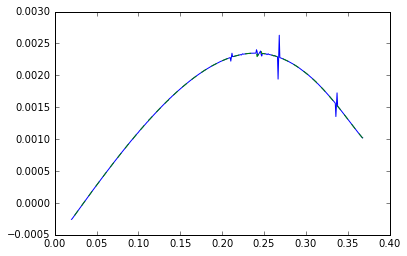

In [9]:
mu=0.4
Om=[]
#Om_old=[]
for i in range(n):
    Om.append(Omega(phi_range[i],mu,0))
#    Om_old.append(Omega(phi_range[i],mu))
plt.plot(phi_range,np.gradient(Om)/np.gradient(phi_range))
#plt.plot(phi_range,np.gradient(Om_old)/np.gradient(phi_range))
DD=[]
for i in range(n):
    DD.append(D(phi_range[i],mu,0))
plt.plot(phi_range,DD,'--')

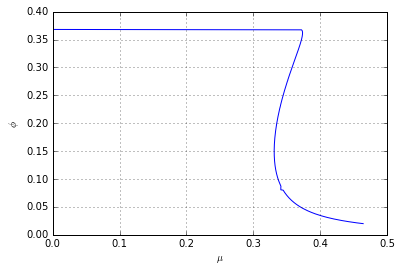

In [39]:
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(True)
plt.plot(mu_range,phi_range)

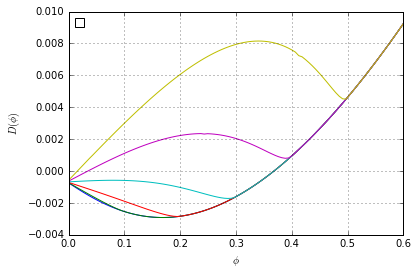

In [40]:
Dphi=plt.figure(1)
x_range=np.linspace(0.001,0.6,100)
plt.xlabel('$\phi$')
plt.ylabel('$D(\phi)$')
plt.legend(('$\mu=0.0$','$\mu=0.1$','$\mu=0.2$','$\mu=0.3$','$\mu=0.4$','$\mu=0.5$'),
           loc='upper left')
plt.grid(True)
for i in range(0,6):
    plt.plot(x_range, [D(phi,i/10,0) for phi in x_range])

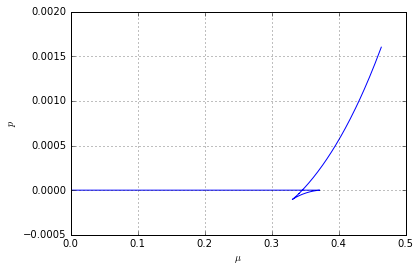

In [41]:
plt.xlabel('$\mu$')
plt.ylabel('$p$')
plt.grid(True)
plt.plot(mu_range,P)

In [66]:
#расчет phi и mu
T=0.025
l=phi0(T)-0.02
n=500
eps=l/n
start=phi0(T)-eps
mu0T=Mu(start,T,0.37)
phiT_range=np.linspace(phi0(T),0.02,n)
muT_range=[]
for phi in phiT_range:
    if phi==phi0(T):
        muT_range.append(0)
    else:
        mu0=Mu(phi,T,mu0)
        muT_range.append(mu0)
#расчет давления
PT=[]
for i in range(n):
    PT.append(-Omega(phiT_range[i],muT_range[i],0))
#расчет mu_star
for i in range(n):
    if(PT[i]>0)and(PT[i-1]<0):
        muT_star=muT_range[i]

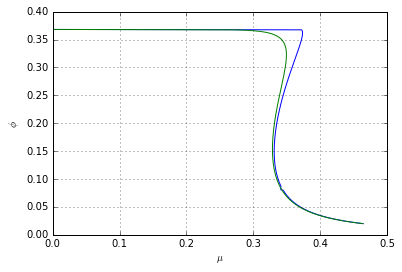

In [67]:
plt.xlabel('$\mu$')
plt.ylabel('$\phi$')
plt.grid(True)
plt.plot(mu_range,phi_range)
plt.plot(muT_range,phiT_range)

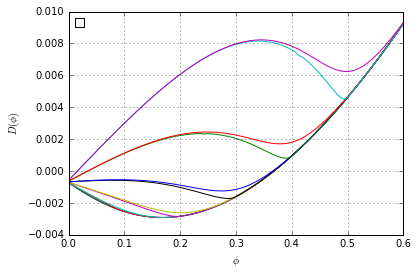

In [68]:
Dphi=plt.figure(1)
x_range=np.linspace(0.001,0.6,100)
plt.xlabel('$\phi$')
plt.ylabel('$D(\phi)$')
plt.legend(('$\mu=0.0$','$\mu=0.1$','$\mu=0.2$','$\mu=0.3$','$\mu=0.4$','$\mu=0.5$'),
           loc='upper left')
plt.grid(True)
for i in range(0,6):
    plt.plot(x_range, [D(phi,i/10,0) for phi in x_range])
    plt.plot(x_range, [D(phi,i/10,T) for phi in x_range])

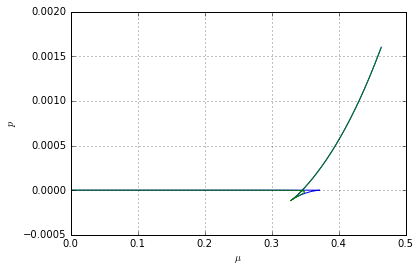

In [69]:
plt.xlabel('$\mu$')
plt.ylabel('$p$')
plt.grid(True)
plt.plot(mu_range,P)
plt.plot(muT_range,PT)

$p(\mu^*)=0 \rightarrow p=\frac{\mu^2}{2\pi^2}-B=\frac{\mu^2-\mu^{*2}}{2\pi^2}\\
B=\frac{\mu^{*2}}{2\pi^2}$